# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Load the data

In [2]:
filepath = "C:/Users/Nabiswa/Downloads/real_estate_price_size_year_view.csv"
traindata = pd.read_csv(filepath)

In [3]:
traindata


,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [6]:
traindata.describe(include='all')

,price,size,year,view
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,No sea view
freq,NaN,NaN,NaN,51
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN


# Prediction with one variable

In [7]:
firsttrain=traindata.copy()

In [8]:
firsttrain

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [9]:
X1= firsttrain['size']
y = firsttrain['price']

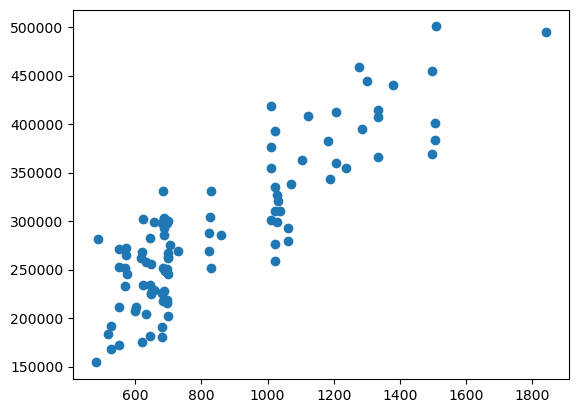

In [11]:
plt.scatter(X1,y)
plt.show()

# Regression

In [13]:
x = sm.add_constant(X1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           8.13e-31
Time:                        14:46:26   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

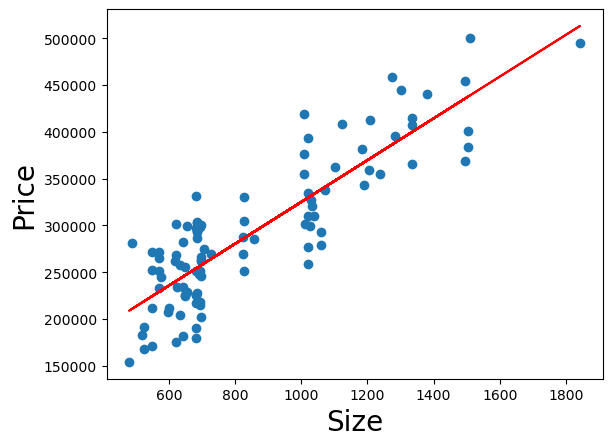

In [16]:
plt.scatter(X1,y)
yhat = (1.019e+05) + 223.1787*X1
plt.plot(X1, yhat, color='red')
plt.xlabel('Size', fontsize= 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

## Prediction

In [24]:
testdata = pd.DataFrame({
    'const':1,
     'size':[536,1733.55,627.2,696.41,1541.6,1238],
     'view':['yes','no','no','yes','yes','yes']
})

In [25]:
testdata

,const,size
0,1,536.00
1,1,1733.55
2,1,627.20
3,1,696.41
4,1,1541.60
5,1,1238.00


In [26]:
predictions = results.predict(testdata)

In [27]:
predictions

0    221536.407832
1    488804.111026
2    241890.309157
3    257336.509932
4    445964.951385
5    378207.885133
dtype: float64

In [28]:
predictionPrices = pd.DataFrame({'Predictions':predictions})

In [29]:
predictionPrices

,Predictions
0,221536.407832
1,488804.111026
2,241890.309157
3,257336.509932
4,445964.951385
5,378207.885133


In [30]:
finaldata = testdata.join(predictionPrices)

In [31]:
finaldata

,const,size,Predictions
0,1,536.00,221536.407832
1,1,1733.55,488804.111026
2,1,627.20,241890.309157
3,1,696.41,257336.509932
4,1,1541.60,445964.951385
5,1,1238.00,378207.885133


# Prediction with two variables

In [32]:
secondtrain = traindata.copy()

In [34]:
secondtrain

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [33]:
test_data = pd.DataFrame({
    'const':1,
     'size':[536,1733.55,627.2,696.41,1541.6,1238],
     'view':['yes','no','no','yes','yes','yes']
})

## Create a dummy variable for 'view'

In [35]:
secondtrain['view'] = secondtrain ['view'].map({'No sea view':0 , 'Sea view': 1})

In [36]:
secondtrain

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


## model

In [37]:
#declare variables
x_one = secondtrain[['size','view']]
y_var = secondtrain['price']

In [41]:
#regression
x = sm.add_constant(x_one)
mymodel = sm.OLS (y_var,x).fit()
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           2.44e-46
Time:                        15:25:21   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.000    6.09e+04     9.4e+04
size         218.7521      8.902     24.574      0.000     201.085     236.420
view        5.756e+04   5278.883     10.904      0.000    4.71e+04     6.8e+04
==============================================================================
Omnibus:                       24.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.619
Skew:                           0.896   Prob(JB):                     2.27e-12
Kurtosis:                       6.107   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
yhat1 = 7.748e+04 + (secondtrain['size']*218.7521) + (0*5.756e+04)
yhat2 = 7.748e+04 + (secondtrain['size']*218.7521) + (1*5.756e+04)

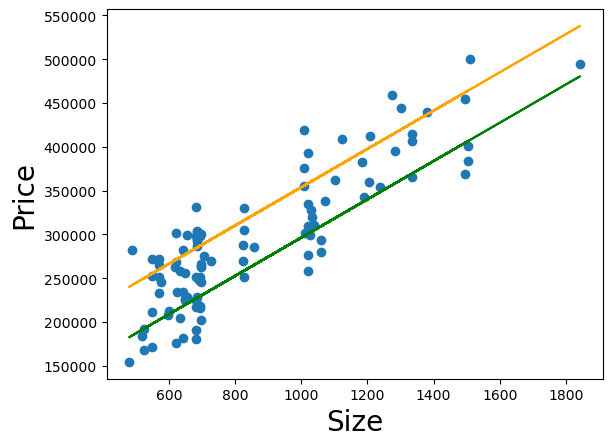

In [46]:
#Comparing price against size with regard to view

plt.scatter(secondtrain['size'],y_var)
fig1= plt.plot(secondtrain['size'],yhat1,color='green')
fig2= plt.plot(secondtrain['size'],yhat2,color='orange')
plt.xlabel('Size',fontsize = 20)
plt.ylabel('Price' , fontsize = 20)
plt.show()

In [49]:
# #Comparing price against size with regard to view
# plt.scatter(secondtrain['view'],y_var)
# fig1= plt.plot(secondtrain['view'],yhat1,color='black')
# fig2= plt.plot(secondtrain['view'],yhat2,color='red')
# plt.xlabel('view',fontsize = 20)
# plt.ylabel('Price' , fontsize = 20)
# plt.show()

In [50]:
# plt.plot(secondtrain['view'],y_var)

## Prediction

In [51]:
test_data

,const,size,view
0,1,536.00,yes
1,1,1733.55,no
2,1,627.20,no
3,1,696.41,yes
4,1,1541.60,yes
5,1,1238.00,yes


In [52]:
test_data['view']= test_data['view'].map({'yes': 1, 'no': 0})

In [53]:
test_data

,const,size,view
0,1,536.00,1
1,1,1733.55,0
2,1,627.20,0
3,1,696.41,1
4,1,1541.60,1
5,1,1238.00,1


In [54]:
predictions2 = mymodel.predict(test_data)

In [55]:
predictions2

0    252295.282667
1    456702.014732
2    214685.625469
3    287385.307525
4    472272.397542
5    405859.259042
dtype: float64

In [58]:
Prediction2 = pd.DataFrame({'Predictions' : predictions2})

In [60]:
final_output = test_data.join(Prediction2)

In [61]:
final_output

,const,size,view,Predictions
0,1,536.00,1,252295.282667
1,1,1733.55,0,456702.014732
2,1,627.20,0,214685.625469
3,1,696.41,1,287385.307525
4,1,1541.60,1,472272.397542
5,1,1238.00,1,405859.259042


In [62]:
finaldata

,const,size,Predictions
0,1,536.00,221536.407832
1,1,1733.55,488804.111026
2,1,627.20,241890.309157
3,1,696.41,257336.509932
4,1,1541.60,445964.951385
5,1,1238.00,378207.885133


In [63]:
final_output

,const,size,view,Predictions
0,1,536.00,1,252295.282667
1,1,1733.55,0,456702.014732
2,1,627.20,0,214685.625469
3,1,696.41,1,287385.307525
4,1,1541.60,1,472272.397542
5,1,1238.00,1,405859.259042
